# Writing a linear solver #


In [3]:
from fenics import *
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Define boundary condition
def boundary(x, on_boundary):
    return on_boundary

Reference problem is taken from assignment 2 I think, at least this was the linear Poisson equation.

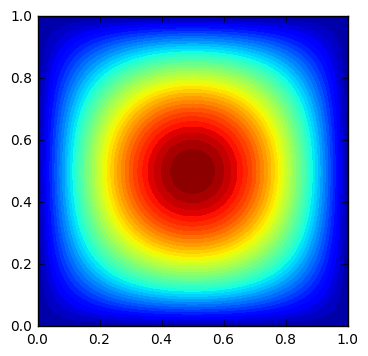

In [4]:
h = 64
mesh = UnitSquareMesh(h, h)   # generate mesh
V = FunctionSpace(mesh, 'P', 1)    # create finite element function space V, based on linear Lagrange elements
# plot(mesh)

f_exp = Expression('2*pi*pi * sin(pi*x[0]) * sin(pi*x[1])', degree=4)

# Define boundary condition
def boundary(x, on_boundary):
    return on_boundary

u_D = Expression('sin(pi*x[0]) * sin(pi*x[1])', degree=4)
bc = DirichletBC(V, u_D, boundary)

u = TrialFunction(V)
v = TestFunction(V)

a = inner(grad(u), grad(v))*dx
L = f_exp * v * dx

# Compute solution
uref = Function(V)
solve(a == L, uref, bc,
      solver_parameters={'linear_solver': 'cg',
                         'preconditioner': 'petsc_amg'})
plot(uref)

To make sure we understand the linear solver the function below shows the steps in solving a linear problem:

In [5]:
def linear_solve(a, L, uh, bc): 
    A = assemble(a)
    b = assemble(L) 
    bc.apply(A, b) 
    x = uh.vector() 
    solve(A, x, b)
    return x

The linear solver is applied on the Poisson equation and we get the same result as above:

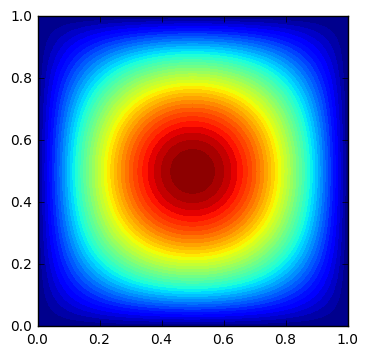

In [6]:

u = TrialFunction(V)
v = TestFunction(V)

a = inner(grad(u), grad(v))*dx
L = f_exp * v * dx

# Compute solution
uh = Function(V)
uh.vector()[:] = linear_solve(a, L, uh, bc)
plot(uh)